# Waymo Start
ref: https://colab.research.google.com/github/waymo-research/waymo-open-dataset/blob/master/tutorial/tutorial.ipynb#scrollTo=sLIUOJzSyjj6

In [1]:
!nvidia-smi

Tue Mar 16 11:46:42 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.87.00    Driver Version: 418.87.00    CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  On   | 00000000:04:00.0 Off |                    0 |
| N/A   28C    P0    33W / 250W |  11567MiB / 12198MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [1]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [2]:
print("Keras Version: ", tf.keras.__version__)
#check GPU
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print(physical_devices)

Keras Version:  2.4.0
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
!pip list | grep torch

torch                         1.6.0+cu101
torchvision                   0.7.0+cu101


In [4]:
!pip list | grep waymo-open-dataset

waymo-open-dataset-tf-2-1-0   1.2.0


In [27]:
!pip list | grep tensorflow

tensorflow                    2.3.0
tensorflow-addons             0.12.0
tensorflow-datasets           4.2.0
tensorflow-estimator          2.3.0
tensorflow-hub                0.11.0
tensorflow-metadata           0.26.0
tensorflow-model-optimization 0.5.0


# Update waymo api
pip uninstall waymo-open-dataset-tf-2-1-0
pip install waymo-open-dataset-tf-2-3-0

In [1]:
import tensorflow as tf
print(tf.__version__)
print("Keras Version: ", tf.keras.__version__)
#check GPU
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print(physical_devices)

2.3.0
Keras Version:  2.4.0
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [2]:
!pip list | grep waymo-open-dataset

waymo-open-dataset-tf-2-3-0   1.3.0


In [2]:
import os
import tensorflow.compat.v1 as tf
import math
import numpy as np
import itertools

tf.enable_eager_execution()

from waymo_open_dataset.utils import range_image_utils
from waymo_open_dataset.utils import transform_utils
from waymo_open_dataset.utils import  frame_utils
from waymo_open_dataset import dataset_pb2 as open_dataset

# Read one frame
Each file in the dataset is a sequence of frames ordered by frame start timestamps. We have extracted two frames from the dataset to demonstrate the dataset format.

In [4]:
!ls /data/cmpe249-f20/Waymo

SmallTFRecord  training_0006  training_0015  training_0024  validation_0000
test	       training_0007  training_0016  training_0025  validation_0001
training       training_0008  training_0017  training_0026  validation_0002
training_0000  training_0009  training_0018  training_0027  validation_0003
training_0001  training_0010  training_0019  training_0028  validation_0004
training_0002  training_0011  training_0020  training_0029  validation_0005
training_0003  training_0012  training_0021  training_0030  validation_0006
training_0004  training_0013  training_0022  training_0031  validation_0007
training_0005  training_0014  training_0023  validation


In [5]:
!ls /data/cmpe249-f20/Waymo/training_0000

segment-10017090168044687777_6380_000_6400_000_with_camera_labels.tfrecord
segment-10023947602400723454_1120_000_1140_000_with_camera_labels.tfrecord
segment-1005081002024129653_5313_150_5333_150_with_camera_labels.tfrecord
segment-10061305430875486848_1080_000_1100_000_with_camera_labels.tfrecord
segment-10072140764565668044_4060_000_4080_000_with_camera_labels.tfrecord
segment-10072231702153043603_5725_000_5745_000_with_camera_labels.tfrecord
segment-10075870402459732738_1060_000_1080_000_with_camera_labels.tfrecord
segment-10082223140073588526_6140_000_6160_000_with_camera_labels.tfrecord
segment-10094743350625019937_3420_000_3440_000_with_camera_labels.tfrecord
segment-10096619443888687526_2820_000_2840_000_with_camera_labels.tfrecord
segment-10107710434105775874_760_000_780_000_with_camera_labels.tfrecord
segment-10153695247769592104_787_000_807_000_with_camera_labels.tfrecord
segment-10206293520369375008_2796_800_2816_800_with_camera_labels.tfrecord
segment-10212406498497081993_5

In [6]:
#import mmcv

In [7]:
FILENAME = '/data/cmpe249-f20/Waymo/training_0000/segment-10017090168044687777_6380_000_6400_000_with_camera_labels.tfrecord'
dataset = tf.data.TFRecordDataset(FILENAME, compression_type='')
frames=[]
count=0
file_idx=0
for frame_idx, data in enumerate(dataset):
    print("frame_idx:", frame_idx)
    
    frame = open_dataset.Frame()#dataset_pb2.Frame()
    frame.ParseFromString(bytearray(data.numpy()))
    frames.append(frame)
    for img in frame.images:
        count=count+1
        img_path = f'{str(img.name - 1)}/' + \
            f'{str(file_idx).zfill(3)}' + \
            f'{str(frame_idx).zfill(3)}.png'
#         img = mmcv.imfrombytes(img.image)
#         mmcv.imwrite(img, img_path)
        #print("image count:", count)


frame_idx: 0
frame_idx: 1
frame_idx: 2
frame_idx: 3
frame_idx: 4
frame_idx: 5
frame_idx: 6
frame_idx: 7
frame_idx: 8
frame_idx: 9
frame_idx: 10
frame_idx: 11
frame_idx: 12
frame_idx: 13
frame_idx: 14
frame_idx: 15
frame_idx: 16
frame_idx: 17
frame_idx: 18
frame_idx: 19
frame_idx: 20
frame_idx: 21
frame_idx: 22
frame_idx: 23
frame_idx: 24
frame_idx: 25
frame_idx: 26
frame_idx: 27
frame_idx: 28
frame_idx: 29
frame_idx: 30
frame_idx: 31
frame_idx: 32
frame_idx: 33
frame_idx: 34
frame_idx: 35
frame_idx: 36
frame_idx: 37
frame_idx: 38
frame_idx: 39
frame_idx: 40
frame_idx: 41
frame_idx: 42
frame_idx: 43
frame_idx: 44
frame_idx: 45
frame_idx: 46
frame_idx: 47
frame_idx: 48
frame_idx: 49
frame_idx: 50
frame_idx: 51
frame_idx: 52
frame_idx: 53
frame_idx: 54
frame_idx: 55
frame_idx: 56
frame_idx: 57
frame_idx: 58
frame_idx: 59
frame_idx: 60
frame_idx: 61
frame_idx: 62
frame_idx: 63
frame_idx: 64
frame_idx: 65
frame_idx: 66
frame_idx: 67
frame_idx: 68
frame_idx: 69
frame_idx: 70
frame_idx: 71
fr

In [39]:
198*5

990

In [45]:
count

990

In [46]:
frame.context #Refer to dataset.proto for the data format. The context contains shared information among all frames in the scene.

name: "10017090168044687777_6380_000_6400_000"
camera_calibrations {
  name: FRONT
  intrinsic: 2059.612011552946
  intrinsic: 2059.612011552946
  intrinsic: 952.4121898799498
  intrinsic: 634.5872082485005
  intrinsic: 0.03545287376426267
  intrinsic: -0.33830085391165776
  intrinsic: 1.9229596190070855e-05
  intrinsic: 0.0007138551068011635
  intrinsic: 0.0
  extrinsic {
    transform: 0.9999785086634438
    transform: 0.003142074430868787
    transform: 0.005754092413724721
    transform: 1.5391467608686606
    transform: -0.0032444997400664865
    transform: 0.999834903267396
    transform: 0.017878462733512377
    transform: -0.02402951085443307
    transform: -0.005696966971249904
    transform: -0.017896747652793314
    transform: 0.9998236099386635
    transform: 2.115778469674332
    transform: 0.0
    transform: 0.0
    transform: 0.0
    transform: 1.0
  }
  width: 1920
  height: 1280
  rolling_shutter_direction: LEFT_TO_RIGHT
}
camera_calibrations {
  name: FRONT_LEFT
  int

In [47]:
print(frame.context.camera_calibrations)

[name: FRONT
intrinsic: 2059.612011552946
intrinsic: 2059.612011552946
intrinsic: 952.4121898799498
intrinsic: 634.5872082485005
intrinsic: 0.03545287376426267
intrinsic: -0.33830085391165776
intrinsic: 1.9229596190070855e-05
intrinsic: 0.0007138551068011635
intrinsic: 0.0
extrinsic {
  transform: 0.9999785086634438
  transform: 0.003142074430868787
  transform: 0.005754092413724721
  transform: 1.5391467608686606
  transform: -0.0032444997400664865
  transform: 0.999834903267396
  transform: 0.017878462733512377
  transform: -0.02402951085443307
  transform: -0.005696966971249904
  transform: -0.017896747652793314
  transform: 0.9998236099386635
  transform: 2.115778469674332
  transform: 0.0
  transform: 0.0
  transform: 0.0
  transform: 1.0
}
width: 1920
height: 1280
rolling_shutter_direction: LEFT_TO_RIGHT
, name: FRONT_LEFT
intrinsic: 2046.6346113297673
intrinsic: 2046.6346113297673
intrinsic: 975.056043638034
intrinsic: 640.9087071643551
intrinsic: 0.030496309445083532
intrinsic:

In [48]:
print(frame.projected_lidar_labels)

[name: FRONT
labels {
  box {
    center_x: 505.88083117774426
    center_y: 543.5624011393937
    width: 107.23522980306444
    length: 101.38423428434896
  }
  metadata {
    speed_x: -0.0036382409956980583
    speed_y: 0.009346725876991906
    accel_x: -0.0008630887474379305
    accel_y: 0.0007554446167527828
  }
  type: TYPE_SIGN
  id: "1PsMDSrIiG9JtR56AjNz4Q_FRONT"
}
labels {
  box {
    center_x: 1159.776848182823
    center_y: 714.7937500710225
    width: 157.05889184747082
    length: 200.95940529802988
  }
  metadata {
    speed_x: 0.0
    speed_y: 0.0
    accel_x: 0.0
    accel_y: 0.0
  }
  type: TYPE_VEHICLE
  id: "6OLGLOespRwkKEzGq-ertA_FRONT"
}
labels {
  box {
    center_x: 970.7074074987235
    center_y: 572.0241531727837
    width: 73.96468718610276
    length: 81.2528271815529
  }
  metadata {
    speed_x: -4.2226133429583756e-29
    speed_y: -3.3780906743667005e-28
    accel_x: -5.278266993307198e-29
    accel_y: -4.222613594645759e-28
  }
  type: TYPE_VEHICLE
  id: "

In [49]:
print(frame.camera_labels)

[name: FRONT
labels {
  box {
    center_x: 1073.07141
    center_y: 570.3257699999999
    width: 60.001049999999964
    length: 65.68535999999995
  }
  type: TYPE_VEHICLE
  id: "1fa40b66-1897-4d0b-93e9-a9445372962b"
}
labels {
  box {
    center_x: 1303.60176
    center_y: 538.11468
    width: 63.79059000000001
    length: 95.37009000000012
  }
  type: TYPE_VEHICLE
  id: "390532ce-170a-4195-bb33-3da06867538d"
}
labels {
  box {
    center_x: 1172.86263
    center_y: 552.6412499999999
    width: 63.79058999999995
    length: 86.52783
  }
  type: TYPE_VEHICLE
  id: "56582dbe-aa18-4743-9bea-2dff4ab1288f"
}
labels {
  box {
    center_x: 961.91157
    center_y: 570.3257699999999
    width: 63.79058999999995
    length: 85.26464999999996
  }
  type: TYPE_VEHICLE
  id: "66355bd8-db76-4a7c-99e6-3294a45825c1"
}
labels {
  box {
    center_x: 1363.6028099999999
    center_y: 841.27788
    width: 233.68830000000003
    length: 345.47973
  }
  type: TYPE_VEHICLE
  id: "66521395-87a2-4a07-99a4-be

In [41]:
len(frame.images)

5

In [22]:
frame.images[0].pose 

transform: 0.9482868309813268
transform: -0.23495154098744556
transform: 0.213424130723349
transform: -1257.1832108376184
transform: 0.23309384241643172
transform: 0.9718527764008171
transform: 0.03419709972449725
transform: 10546.041682516148
transform: -0.21545149527198962
transform: 0.017319191368196336
transform: 0.9763609469839603
transform: 22.447
transform: 0.0
transform: 0.0
transform: 0.0
transform: 1.0

In [ ]:
frame.images[0].pose 

# Visualize Camera Images and Camera Labels

In [8]:
objecttype_list = [
            'UNKNOWN', 'VEHICLE', 'PEDESTRIAN', 'SIGN', 'CYCLIST'
        ]

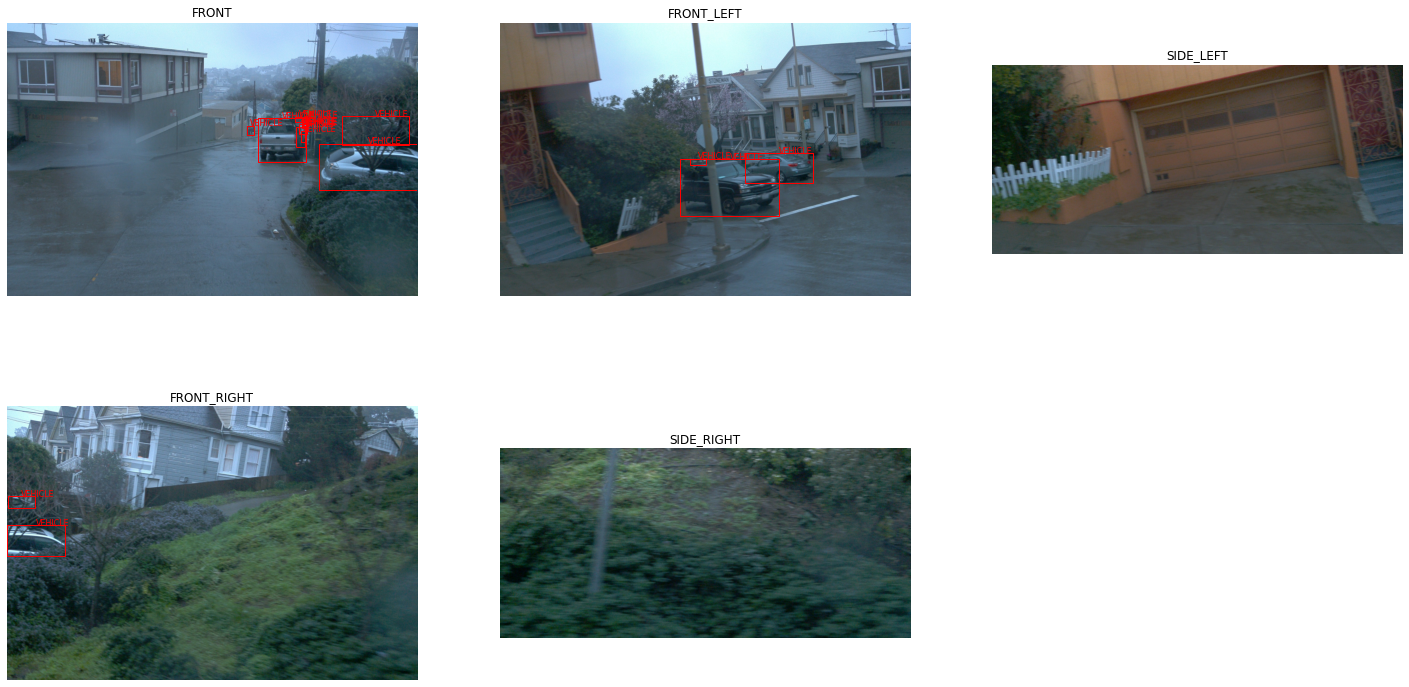

In [9]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline

INSTANCE_Color = {
    'UNKNOWN':'black', 'VEHICLE':'red', 'PEDESTRIAN':'green', 'SIGN': 'yellow', 'CYCLIST':'purple'
}#'Unknown', 'Vehicles', 'Pedestrians', 'Cyclists'

def show_camera_image(camera_image, camera_labels, layout, cmap=None):
    """Show a camera image and the given camera labels."""

    ax = plt.subplot(*layout)

    # Draw the camera labels.
    for camera_label in camera_labels: #frame.camera_labels:
        #print(camera_labels)
        # Ignore camera labels that do not correspond to this camera.
        if camera_label.name != camera_image.name:
            continue

        # Iterate over the individual labels.
        for label in camera_label.labels:
            #print(label.type) #1 for vehicle
            objectclass=objecttype_list[label.type]
            colorlabel=INSTANCE_Color[objectclass]
            #print(label.id) #1fa40b66-1897-4d0b-93e9-a9445372962b
            xmin=label.box.center_x - 0.5 * label.box.length
            ymin=label.box.center_y - 0.5 * label.box.width
            # Draw the object bounding box.
            ax.add_patch(patches.Rectangle(
                xy=(xmin,ymin),
                width=label.box.length,
                height=label.box.width,
                linewidth=1,
                edgecolor=colorlabel,
                facecolor='none'))
            ax.text(label.box.center_x, ymin, objectclass, color=colorlabel, fontsize=8)

    # Show the camera image.
    plt.imshow(tf.image.decode_jpeg(camera_image.image), cmap=cmap)
    plt.title(open_dataset.CameraName.Name.Name(camera_image.name))
    plt.grid(False)
    plt.axis('off')


plt.figure(figsize=(25, 20))
currentframe = frames[10]
for index, image in enumerate(currentframe.images):#each frame has 5 images
    show_camera_image(image, currentframe.camera_labels, [3, 3, index+1])

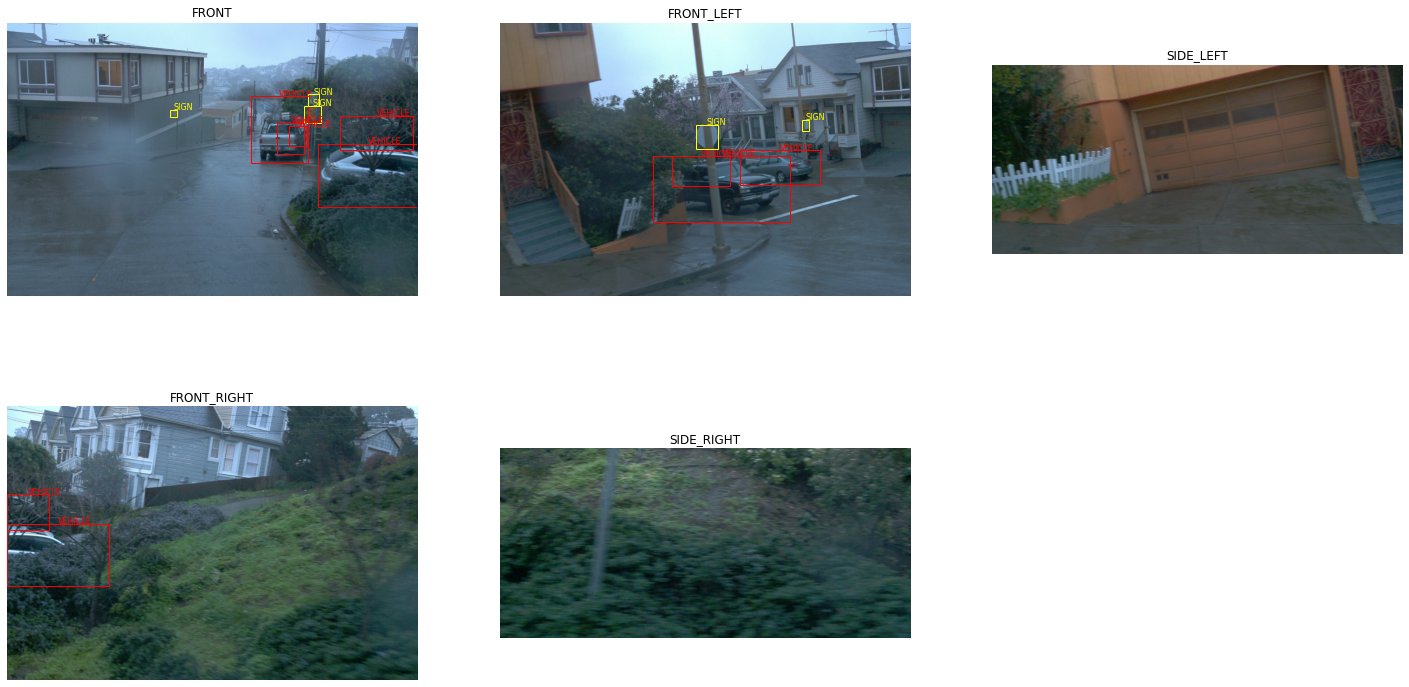

In [10]:
def show_camera_image_lidar2dlabel(camera_image, camera_labels, layout, cmap=None):
    """Show a camera image and the given camera labels."""

    ax = plt.subplot(*layout)

    # Draw the camera labels.
    for camera_label in camera_labels: #frame.camera_labels:
        #print(camera_labels)
        # Ignore camera labels that do not correspond to this camera.
        if camera_label.name != camera_image.name:
            continue

        # Iterate over the individual labels.
        for label in camera_label.labels:
            #print(label.type) #1 for vehicle
            objectclass=objecttype_list[label.type]
            colorlabel=INSTANCE_Color[objectclass]
            #print(label.id) #1fa40b66-1897-4d0b-93e9-a9445372962b
            xmin=label.box.center_x - 0.5 * label.box.length
            ymin=label.box.center_y - 0.5 * label.box.width
            # Draw the object bounding box.
            ax.add_patch(patches.Rectangle(
                xy=(xmin,ymin),
                width=label.box.length,
                height=label.box.width,
                linewidth=1,
                edgecolor=colorlabel,
                facecolor='none'))
            ax.text(label.box.center_x, ymin, objectclass, color=colorlabel, fontsize=8)

    # Show the camera image.
    plt.imshow(tf.image.decode_jpeg(camera_image.image), cmap=cmap)
    plt.title(open_dataset.CameraName.Name.Name(camera_image.name))
    plt.grid(False)
    plt.axis('off')
    
plt.figure(figsize=(25, 20))
currentframe = frames[10]
for index, image in enumerate(currentframe.images):#each frame has 5 images
    show_camera_image(image, currentframe.projected_lidar_labels, [3, 3, index+1])

In [11]:
cameraorder={
    0:1, 1:0, 2:3, 3:2, 4:4
}#Front, front_left, side_left, front_right, side_right

In [12]:
len(currentframe.images)

5

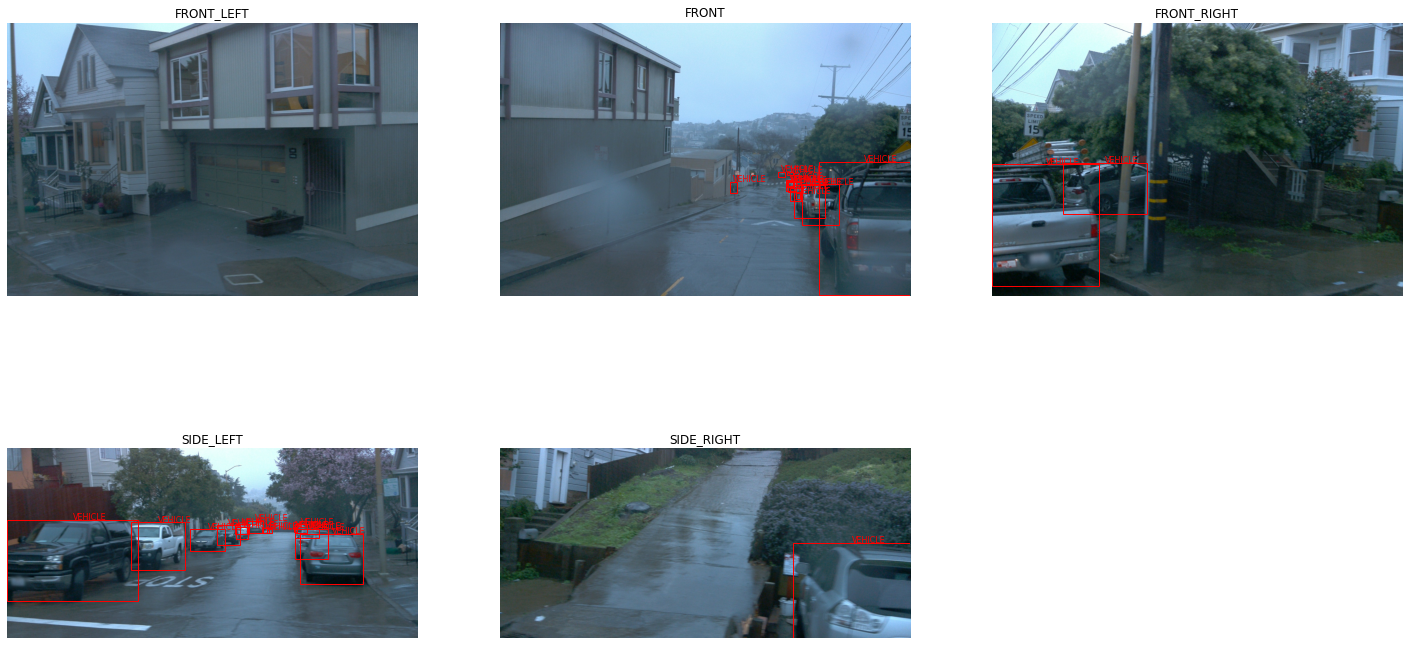

In [13]:
plt.figure(figsize=(25, 20))
currentframe = frames[40]
for index in range(0,5):#each frame has 5 images
    newindex=cameraorder[index]
    image=currentframe.images[newindex]
    show_camera_image(image, currentframe.camera_labels, [3, 3, index+1])

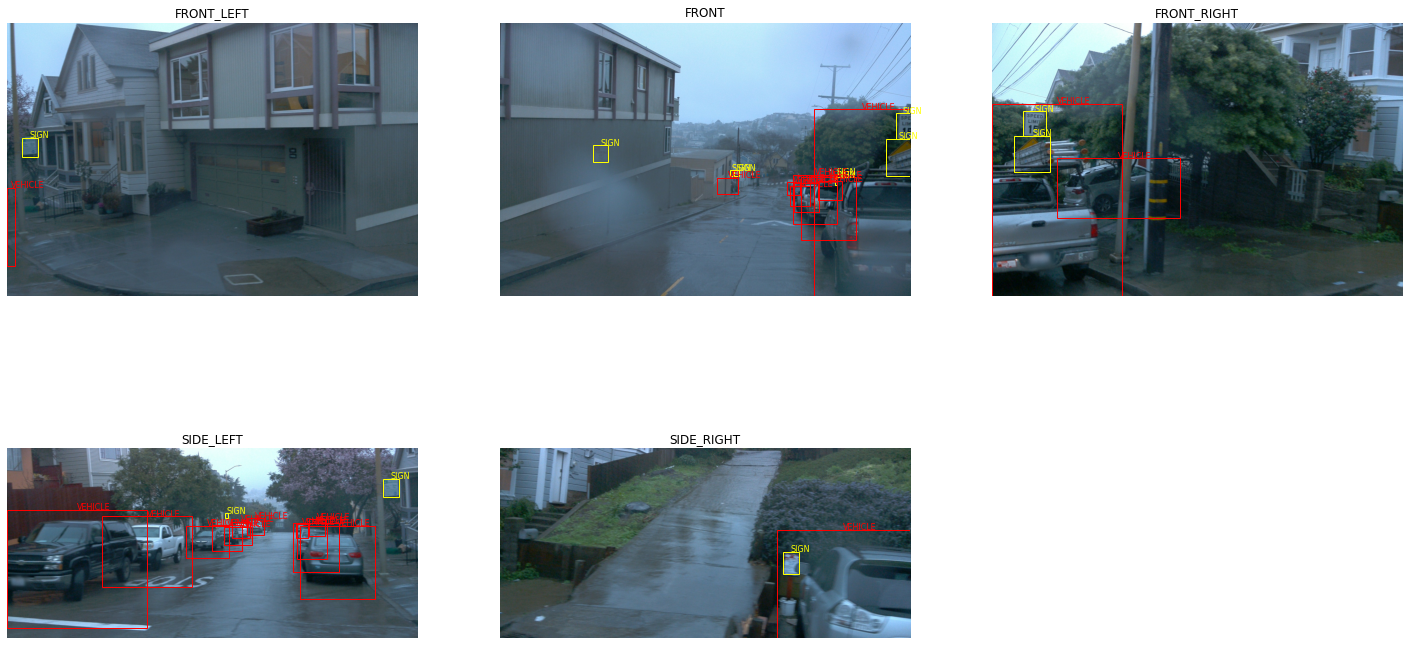

In [14]:
plt.figure(figsize=(25, 20))
currentframe = frames[40]
for index in range(0,5):#each frame has 5 images
    newindex=cameraorder[index]
    image=currentframe.images[newindex]
    show_camera_image(image, currentframe.projected_lidar_labels, [3, 3, index+1])

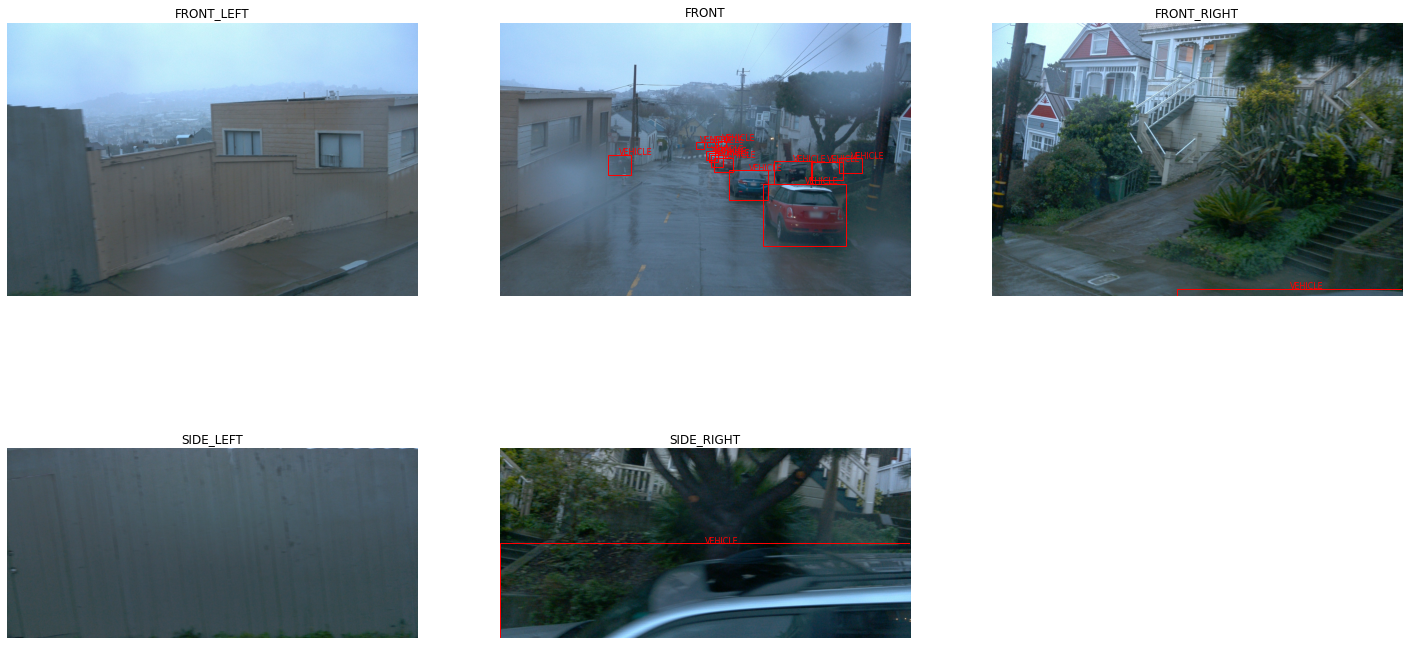

In [15]:
frameindex=100
plt.figure(figsize=(25, 20))
currentframe = frames[frameindex]
for index in range(0,5):#each frame has 5 images
    newindex=cameraorder[index]
    image=currentframe.images[newindex]
    show_camera_image(image, currentframe.camera_labels, [3, 3, index+1])

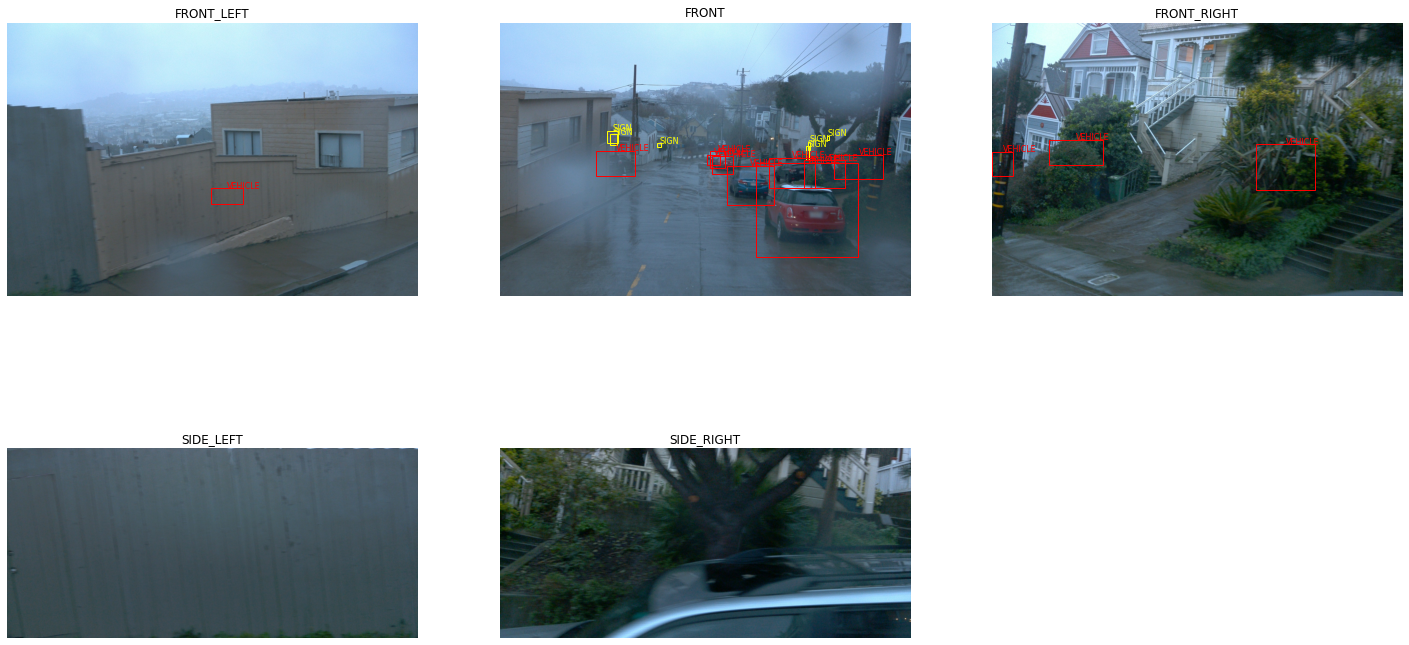

In [16]:
frameindex=100
plt.figure(figsize=(25, 20))
currentframe = frames[frameindex]
for index in range(0,5):#each frame has 5 images
    newindex=cameraorder[index]
    image=currentframe.images[newindex]
    show_camera_image(image, currentframe.projected_lidar_labels, [3, 3, index+1])

# Visualize Range Images
ref: https://github.com/waymo-research/waymo-open-dataset/blob/master/waymo_open_dataset/utils/frame_utils.py
Returns:
     range_images: A dict of {laser_name,
       [range_image_first_return, range_image_second_return]}.
     camera_projections: A dict of {laser_name,
       [camera_projection_from_first_return,
        camera_projection_from_second_return]}.
    range_image_top_pose: range image pixel pose for top lidar.

In [19]:
currentframe = frames[frameindex]
for laser in currentframe.lasers:
    print(laser.name)

1
2
3
4
5


In [20]:
open_dataset.LaserName.TOP

1

In [17]:
(range_images, camera_projections, range_image_top_pose) = frame_utils.parse_range_image_and_camera_projection(currentframe)

In [22]:
for key, value in range_images.items() :
    print(key)

1
2
3
4
5


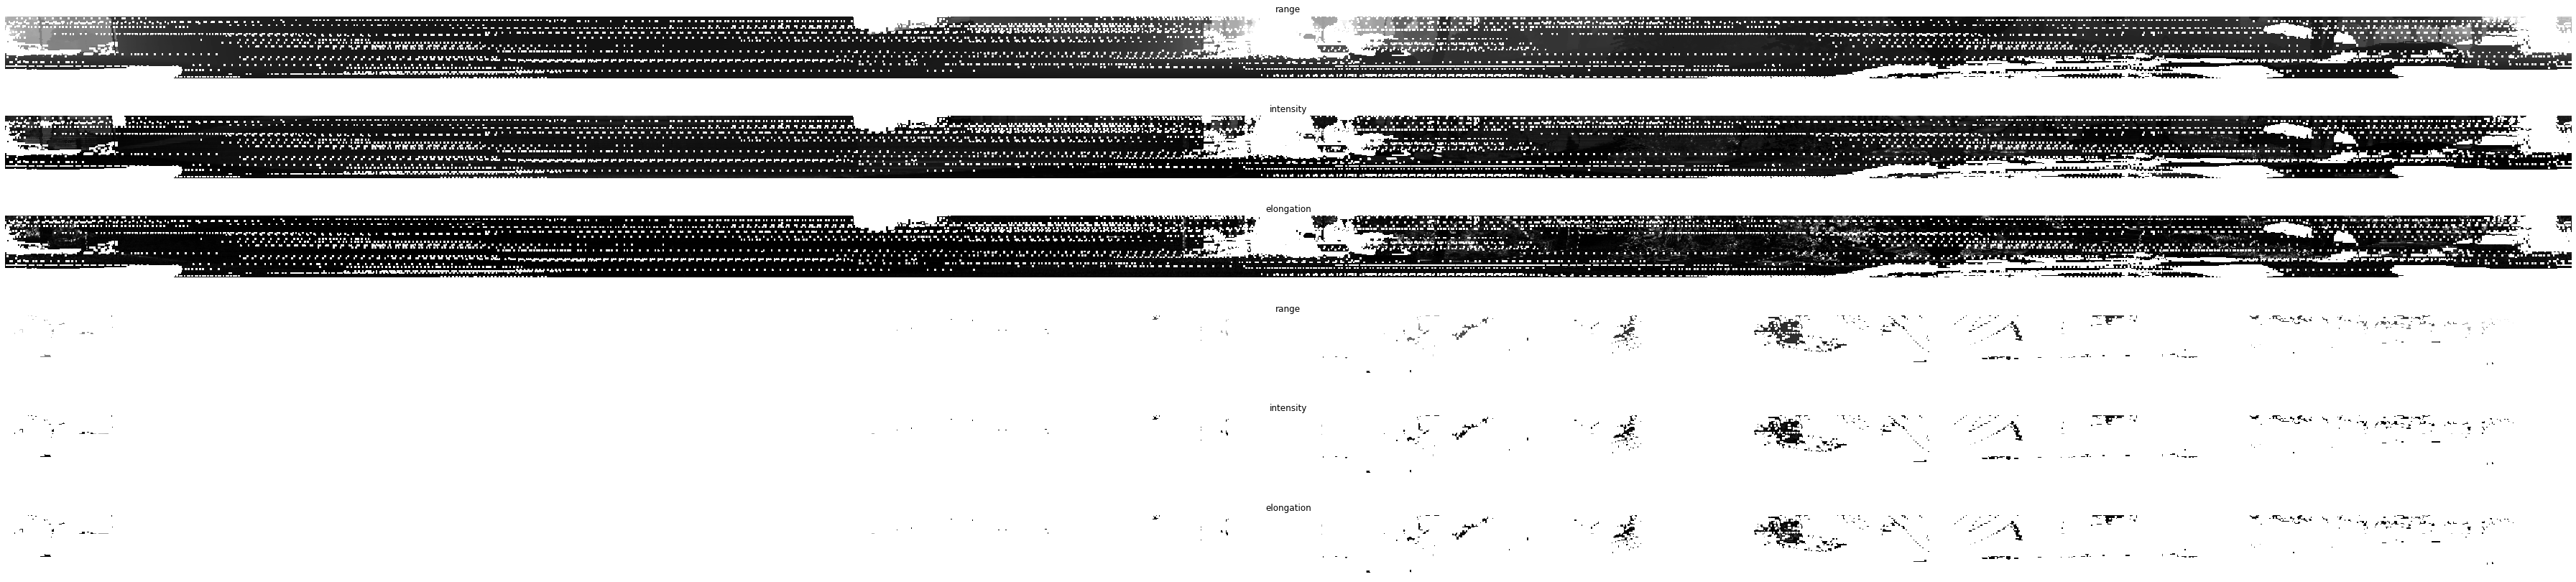

In [23]:
plt.figure(figsize=(64, 20))
def plot_range_image_helper(data, name, layout, vmin = 0, vmax=1, cmap='gray'):
    """Plots range image.

    Args:
    data: range image data
    name: the image title
    layout: plt layout
    vmin: minimum value of the passed data
    vmax: maximum value of the passed data
    cmap: color map
    """
    plt.subplot(*layout)
    plt.imshow(data, cmap=cmap, vmin=vmin, vmax=vmax)
    plt.title(name)
    plt.grid(False)
    plt.axis('off')

def get_range_image(laser_name, return_index):
    """Returns range image given a laser name and its return index."""
    return range_images[laser_name][return_index]

def show_range_image(range_image, layout_index_start = 1):
    """Shows range image.

    Args:
    range_image: the range image data from a given lidar of type MatrixFloat.
    layout_index_start: layout offset
    """
    range_image_tensor = tf.convert_to_tensor(range_image.data)
    range_image_tensor = tf.reshape(range_image_tensor, range_image.shape.dims)
    lidar_image_mask = tf.greater_equal(range_image_tensor, 0)
    range_image_tensor = tf.where(lidar_image_mask, range_image_tensor,
                                tf.ones_like(range_image_tensor) * 1e10)
    range_image_range = range_image_tensor[...,0] 
    range_image_intensity = range_image_tensor[...,1]
    range_image_elongation = range_image_tensor[...,2]
    plot_range_image_helper(range_image_range.numpy(), 'range',
                   [8, 1, layout_index_start], vmax=75, cmap='gray')
    plot_range_image_helper(range_image_intensity.numpy(), 'intensity',
                   [8, 1, layout_index_start + 1], vmax=1.5, cmap='gray')
    plot_range_image_helper(range_image_elongation.numpy(), 'elongation',
                   [8, 1, layout_index_start + 2], vmax=1.5, cmap='gray')
    
frame.lasers.sort(key=lambda laser: laser.name)
show_range_image(get_range_image(open_dataset.LaserName.TOP, 0), 1)
show_range_image(get_range_image(open_dataset.LaserName.TOP, 1), 4)

# Point Cloud Conversion and Visualization

ri_index: 0 for the first return, 1 for the second return. https://github.com/waymo-research/waymo-open-dataset/blob/master/waymo_open_dataset/utils/frame_utils.py keep_polar_features: If true, keep the features from the polar range image (i.e. range, intensity, and elongation) as the first features in the output range image. dict of {laser_name, (H, W, D)} range images in Cartesian coordinates. D will be 3 if keep_polar_features is False (x, y, z) and 6 if keep_polar_features is True (range, intensity, elongation, x, y, z).

Global frame The origin of this frame is set to the vehicle position when the vehicle starts. It is an ‘East-North-Up’ coordinate frame. ‘Up(z)’ is aligned with the gravity vector, positive upwards. ‘East(x)’ points directly east along the line of latitude. ‘North(y)’ points towards the north pole.

Vehicle frame The x-axis is positive forwards, y-axis is positive to the left, z-axis is positive upwards. A vehicle pose defines the transform from the vehicle frame to the global frame.

Sensor frames Each sensor comes with an extrinsic transform that defines the transform from the sensor frame to the vehicle frame.

The camera frame is placed in the center of the camera lens. The x-axis points down the lens barrel out of the lens. The z-axis points up. The y/z plane is parallel to the camera plane. The coordinate system is right handed.

The lidar sensor frame has the z-axis pointing upward with the x/y plane depending on the lidar position.

Lidar Spherical Coordinates The lidar spherical coordinate system is based on the Cartesian coordinate system in lidar sensor frame. A point (x, y, z) in lidar Cartesian coordinates can be uniquely translated to a (range, azimuth, inclination) tuple in lidar spherical coordinates.

Kitti frame is Camera: x = right, y = down, z = forward • Velodyne: x = forward, y = left, z = up (same to waymo vehicle frame) • GPS/IMU: x = forward, y = left, z = up

In [18]:
#convert_range_image_to_point_cloud API updated in 1.3
points, cp_points = frame_utils.convert_range_image_to_point_cloud(
    currentframe,
    range_images,
    camera_projections,
    range_image_top_pose,
    keep_polar_features=True)
points_ri2, cp_points_ri2 = frame_utils.convert_range_image_to_point_cloud(
    currentframe,
    range_images,
    camera_projections,
    range_image_top_pose,
    ri_index=1,
    keep_polar_features=True)

# 3d points in vehicle frame. 
points_all = np.concatenate(points, axis=0) #combines 5 lidar data together
points_all_ri2 = np.concatenate(points_ri2, axis=0) # combines 5 lidar data together
# camera projection corresponding to each point.
cp_points_all = np.concatenate(cp_points, axis=0)
cp_points_all_ri2 = np.concatenate(cp_points_ri2, axis=0)

Updated in version 1.3 API

In [21]:
frameindex

100

In [19]:
# declare new index list 
i = [3,4,5,1] 
  
# create output 
pointsxyzintensity_output = points_all[:,i] 

In [20]:
pointsxyzintensity_output.shape

(165908, 4)

In [ ]:
file_idx=0
frame_idx=frameindex
pc_path = f'lidarxyzintensityall' + \
            f'{str(file_idx).zfill(3)}{str(frame_idx).zfill(3)}.bin'
pointsxyzintensity_output.astype(np.float32).tofile(pc_path)

In [ ]:
pointsxyzintensity_topoutput = points[0][:,i] 
pc_path = f'lidarxyzintensitytop' + \
            f'{str(file_idx).zfill(3)}{str(frame_idx).zfill(3)}.bin'
pointsxyzintensity_topoutput.astype(np.float32).tofile(pc_path)

In [ ]:
pointsxyzintensity_topoutput = points_ri2[0][:,i] 
pc_path = f'lidarxyzintensitytopri2' + \
            f'{str(file_idx).zfill(3)}{str(frame_idx).zfill(3)}.bin'
pointsxyzintensity_topoutput.astype(np.float32).tofile(pc_path)

Lidar '_FRONT', '_FRONT_RIGHT', '_FRONT_LEFT', '_SIDE_RIGHT',
            '_SIDE_LEFT'

In [ ]:
pointsxyzintensity_topoutput = points[2][:,i] 
pc_path = f'lidarxyzintensityleft' + \
            f'{str(file_idx).zfill(3)}{str(frame_idx).zfill(3)}.bin'
pointsxyzintensity_topoutput.astype(np.float32).tofile(pc_path)

In [ ]:
pointsxyzintensity_topoutput = points[1][:,i] 
pc_path = f'lidarxyzintensityright' + \
            f'{str(file_idx).zfill(3)}{str(frame_idx).zfill(3)}.bin'
pointsxyzintensity_topoutput.astype(np.float32).tofile(pc_path)

In [117]:
file_idx=0
frame_idx=0
pc_path = f'lidardata' + \
            f'{str(file_idx).zfill(3)}{str(frame_idx).zfill(3)}.bin'
points_all.astype(np.float32).tofile(pc_path)

In [130]:
points_all.shape

(165908, 3)

In [116]:
len(points)

5

In [28]:
#Examine number of points in each lidar sensor.
print(points_all.shape)
print(cp_points_all.shape)
print(points_all[0:2])
for i in range(5):
    print(points[i].shape)
    print(cp_points[i].shape)

(171606, 3)
(171606, 6)
[[-1.9172729e+01 -6.5429688e-02  2.9199677e+00]
 [-1.7224243e+01 -1.5625000e-02  2.8512268e+00]]
(153830, 3)
(153830, 6)
(3844, 3)
(3844, 6)
(3894, 3)
(3894, 6)
(4794, 3)
(4794, 6)
(5244, 3)
(5244, 6)


In [29]:
print(points_all_ri2.shape)
print(cp_points_all_ri2.shape)
print(points_all_ri2[0:2])
for i in range(5):
    print(points_ri2[i].shape)
    print(cp_points_ri2[i].shape)

(12074, 3)
(12074, 6)
[[-1.9289551e+01 -1.7578125e-02  2.9239807e+00]
 [-1.9253906e+01  3.7304688e-01  2.9273758e+00]]
(11340, 3)
(11340, 6)
(40, 3)
(40, 6)
(131, 3)
(131, 6)
(117, 3)
(117, 6)
(446, 3)
(446, 6)


In [122]:
!ls /data/cmpe249-f20/kitti_format/training/

calib	 image_1  image_3  label_0  label_2  label_4	pose
image_0  image_2  image_4  label_1  label_3  label_all	velodyne


In [129]:
!cp /data/cmpe249-f20/kitti_format/training/velodyne/0000010.bin .

In [127]:
!ls /data/cmpe295-liu/kitti/training

calib  depth_map  image_2  image_3  label_2  velodyne  velodyne_reduced


In [128]:
!cp /data/cmpe295-liu/kitti/training/velodyne/000000.bin .

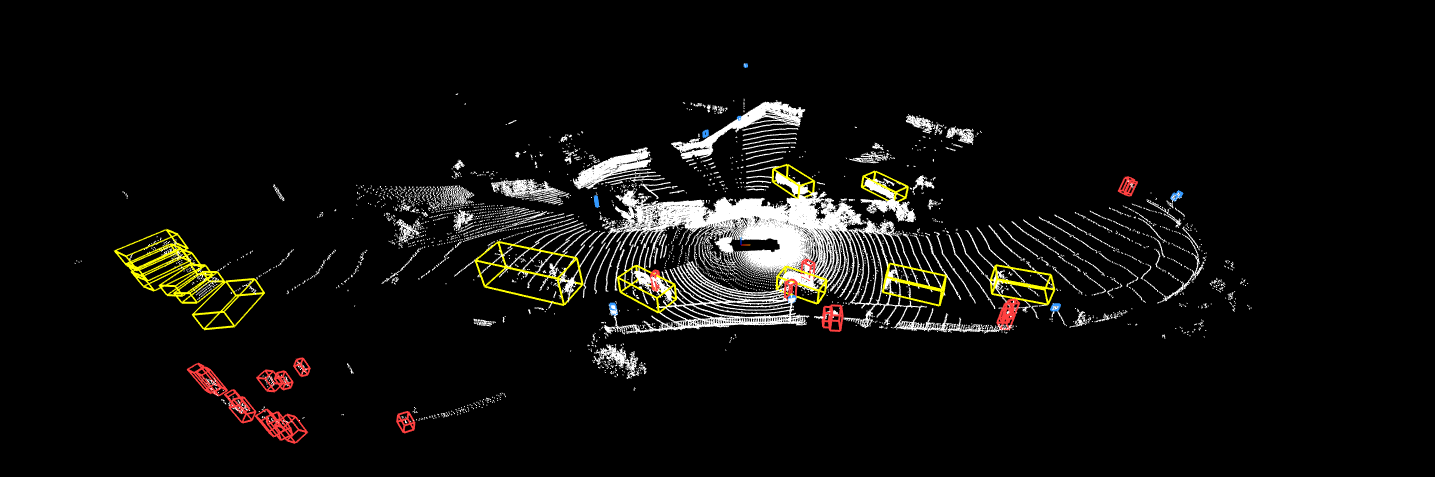

In [24]:
#Show point cloud
from IPython.display import Image, display
display(Image('./waymo-od/tutorial/3d_point_cloud.png'))

# Visualize Camera Projection

In [22]:
images = sorted(currentframe.images, key=lambda i:i.name)
cp_points_all_concat = np.concatenate([cp_points_all, points_all], axis=-1)
cp_points_all_concat_tensor = tf.constant(cp_points_all_concat)

# The distance between lidar points and vehicle frame origin.
points_all_tensor = tf.norm(points_all, axis=-1, keepdims=True)
cp_points_all_tensor = tf.constant(cp_points_all, dtype=tf.int32)

mask = tf.equal(cp_points_all_tensor[..., 0], images[0].name)

cp_points_all_tensor = tf.cast(tf.gather_nd(
    cp_points_all_tensor, tf.where(mask)), dtype=tf.float32)
points_all_tensor = tf.gather_nd(points_all_tensor, tf.where(mask))

projected_points_all_from_raw_data = tf.concat(
    [cp_points_all_tensor[..., 1:3], points_all_tensor], axis=-1).numpy()

In [23]:
def rgba(r):
  """Generates a color based on range.

  Args:
    r: the range value of a given point.
  Returns:
    The color for a given range
  """
  c = plt.get_cmap('jet')((r % 20.0) / 20.0)
  c = list(c)
  c[-1] = 0.5  # alpha
  return c

def plot_image(camera_image):
  """Plot a cmaera image."""
  plt.figure(figsize=(20, 12))
  plt.imshow(tf.image.decode_jpeg(camera_image.image))
  plt.grid("off")

def plot_points_on_image(projected_points, camera_image, rgba_func,
                         point_size=5.0):
  """Plots points on a camera image.

  Args:
    projected_points: [N, 3] numpy array. The inner dims are
      [camera_x, camera_y, range].
    camera_image: jpeg encoded camera image.
    rgba_func: a function that generates a color from a range value.
    point_size: the point size.

  """
  plot_image(camera_image)

  xs = []
  ys = []
  colors = []

  for point in projected_points:
    xs.append(point[0])  # width, col
    ys.append(point[1])  # height, row
    colors.append(rgba_func(point[2]))

  plt.scatter(xs, ys, c=colors, s=point_size, edgecolors="none")

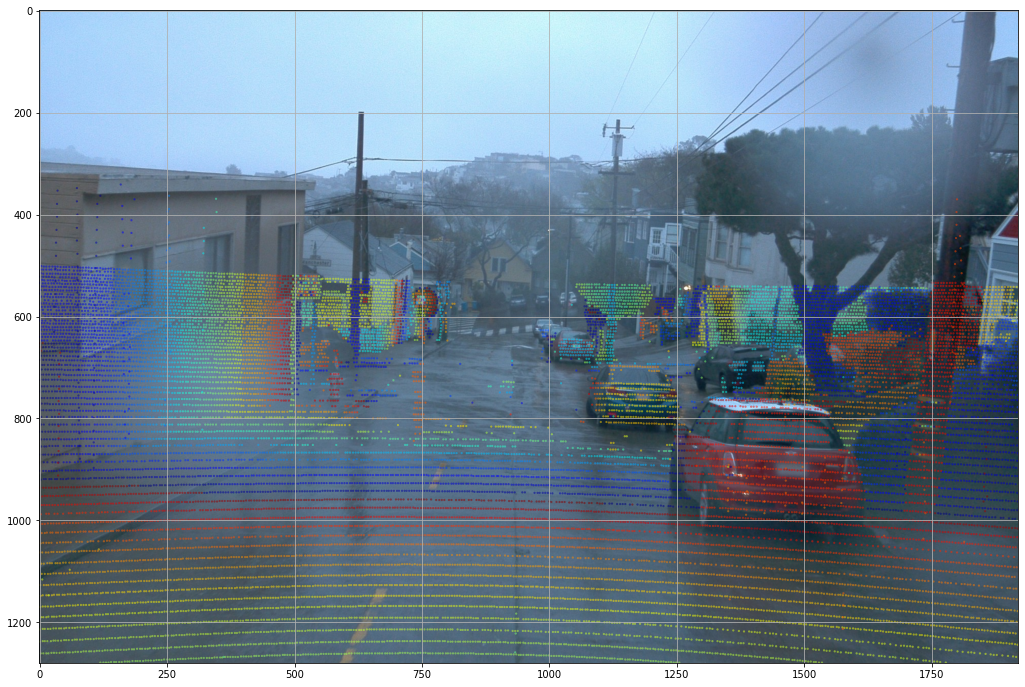

In [24]:
plot_points_on_image(projected_points_all_from_raw_data,
                     images[0], rgba, point_size=5.0)

# File conversion

In [4]:
!ls /data/cmpe249-f20/Waymo

SmallTFRecord  training_0006  training_0015  training_0024  validation_0000
test	       training_0007  training_0016  training_0025  validation_0001
training       training_0008  training_0017  training_0026  validation_0002
training_0000  training_0009  training_0018  training_0027  validation_0003
training_0001  training_0010  training_0019  training_0028  validation_0004
training_0002  training_0011  training_0020  training_0029  validation_0005
training_0003  training_0012  training_0021  training_0030  validation_0006
training_0004  training_0013  training_0022  training_0031  validation_0007
training_0005  training_0014  training_0023  validation


In [5]:
from glob import glob
import os
 
root_path="/data/cmpe249-f20/Waymo"
out_dir="/data/cmpe249-f20/WaymoKittiNew"

#folders = ['training_0000', 'training_0001']
#folders = ["training_0000","training_0001", "training_0002","training_0003","training_0004","training_0005","training_0006","training_0007","training_0008","training_0009", "training_0010", "training_0015", "training_0016", "training_0017","training_0018", "training_0019", "training_0020", "training_0021","training_0022","training_0023","training_0024","training_0025","training_0026","training_0027","training_0028","training_0029","training_0030","training_0031"]#["training_0001"]# ["training_0000", "training_0001"]
folders = ["training_0000","training_0001", "training_0002","training_0003","training_0004","training_0005","training_0006","training_0007","training_0008","training_0009", "training_0010", "training_0015", "training_0016", "training_0017","training_0018", "training_0019", "training_0020", "training_0021","training_0022","training_0023","training_0024","training_0025","training_0026","training_0027","training_0028","training_0029","training_0030","training_0031","validation_0000","validation_0001","validation_0002","validation_0003","validation_0004","validation_0005","validation_0006","validation_0007"]#["training_0001"]# ["training_0000", "training_0001"]

data_files = [path for x in folders for path in glob(os.path.join(root_path, x, "*.tfrecord"))]
print("totoal number of files:", len(data_files))

totoal number of files: 886


In [ ]:
#https://github.com/open-mmlab/mmcv/blob/master/mmcv/utils/progressbar.py

In [6]:
from multiprocessing import Pool #https://docs.python.org/3/library/multiprocessing.html

def f(x):
    return x*x

if __name__ == '__main__':
    with Pool(5) as p:
        print(p.map(f, [1, 2, 3]))

[1, 4, 9]


In [5]:
!nproc

56


In [8]:
tasks=range(100)

In [9]:
tasks[0]

0

In [10]:
tasks[1]

1

In [13]:
chunksize =1
process_num=36
skip_first=False
task_num = len(tasks)
task_num -= process_num * chunksize * int(skip_first)

In [14]:
task_num

100

In [15]:
pool = Pool(process_num)
results = []
gen = pool.imap(f, tasks, chunksize)
for result in gen:
        results.append(result)
pool.close()
pool.join()

In [16]:
results

[0,
 1,
 4,
 9,
 16,
 25,
 36,
 49,
 64,
 81,
 100,
 121,
 144,
 169,
 196,
 225,
 256,
 289,
 324,
 361,
 400,
 441,
 484,
 529,
 576,
 625,
 676,
 729,
 784,
 841,
 900,
 961,
 1024,
 1089,
 1156,
 1225,
 1296,
 1369,
 1444,
 1521,
 1600,
 1681,
 1764,
 1849,
 1936,
 2025,
 2116,
 2209,
 2304,
 2401,
 2500,
 2601,
 2704,
 2809,
 2916,
 3025,
 3136,
 3249,
 3364,
 3481,
 3600,
 3721,
 3844,
 3969,
 4096,
 4225,
 4356,
 4489,
 4624,
 4761,
 4900,
 5041,
 5184,
 5329,
 5476,
 5625,
 5776,
 5929,
 6084,
 6241,
 6400,
 6561,
 6724,
 6889,
 7056,
 7225,
 7396,
 7569,
 7744,
 7921,
 8100,
 8281,
 8464,
 8649,
 8836,
 9025,
 9216,
 9409,
 9604,
 9801]

In [18]:
99*99

9801

# Start multithread conversion

In [15]:
from DatasetTools.Waymo2Kitti import Waymo2KITTI

In [11]:
from os import path as osp
import os
from glob import glob

 
root_path="/data/cmpe249-f20/Waymo"
out_dir="/data/cmpe249-f20/WaymoKittiNew2"

#folders = ["training_0000","training_0001", "training_0002","training_0003","training_0004","training_0005","training_0006","training_0007","training_0008","training_0009", "training_0010", "training_0015", "training_0016", "training_0017","training_0018", "training_0019", "training_0020", "training_0021","training_0022","training_0023","training_0024","training_0025","training_0026","training_0027","training_0028","training_0029","training_0030","training_0031"]#["training_0001"]# ["training_0000", "training_0001"]
folders = ["training_0000","training_0001", "training_0002","training_0003","training_0004","training_0005","training_0006","training_0007","training_0008","training_0009", "training_0010", "training_0015", "training_0016", "training_0017","training_0018", "training_0019", "training_0020", "training_0021","training_0022","training_0023","training_0024","training_0025","training_0026","training_0027","training_0028","training_0029","training_0030","training_0031","validation_0000","validation_0001","validation_0002","validation_0003","validation_0004","validation_0005","validation_0006","validation_0007"]#["training_0001"]# ["training_0000", "training_0001"]

data_files = [path for x in folders for path in glob(os.path.join(root_path, x, "*.tfrecord"))]
print("totoal number of files:", len(data_files))

totoal number of files: 886


In [3]:
data_files[0:10]

['/data/cmpe249-f20/Waymo/training_0000/segment-10094743350625019937_3420_000_3440_000_with_camera_labels.tfrecord',
 '/data/cmpe249-f20/Waymo/training_0000/segment-10017090168044687777_6380_000_6400_000_with_camera_labels.tfrecord',
 '/data/cmpe249-f20/Waymo/training_0000/segment-10023947602400723454_1120_000_1140_000_with_camera_labels.tfrecord',
 '/data/cmpe249-f20/Waymo/training_0000/segment-1005081002024129653_5313_150_5333_150_with_camera_labels.tfrecord',
 '/data/cmpe249-f20/Waymo/training_0000/segment-10061305430875486848_1080_000_1100_000_with_camera_labels.tfrecord',
 '/data/cmpe249-f20/Waymo/training_0000/segment-10072140764565668044_4060_000_4080_000_with_camera_labels.tfrecord',
 '/data/cmpe249-f20/Waymo/training_0000/segment-10072231702153043603_5725_000_5745_000_with_camera_labels.tfrecord',
 '/data/cmpe249-f20/Waymo/training_0000/segment-10075870402459732738_1060_000_1080_000_with_camera_labels.tfrecord',
 '/data/cmpe249-f20/Waymo/training_0000/segment-10082223140073588

In [5]:
data_files[0:10]

['/data/cmpe249-f20/Waymo/training_0000/segment-10094743350625019937_3420_000_3440_000_with_camera_labels.tfrecord',
 '/data/cmpe249-f20/Waymo/training_0000/segment-10017090168044687777_6380_000_6400_000_with_camera_labels.tfrecord',
 '/data/cmpe249-f20/Waymo/training_0000/segment-10023947602400723454_1120_000_1140_000_with_camera_labels.tfrecord',
 '/data/cmpe249-f20/Waymo/training_0000/segment-1005081002024129653_5313_150_5333_150_with_camera_labels.tfrecord',
 '/data/cmpe249-f20/Waymo/training_0000/segment-10061305430875486848_1080_000_1100_000_with_camera_labels.tfrecord',
 '/data/cmpe249-f20/Waymo/training_0000/segment-10072140764565668044_4060_000_4080_000_with_camera_labels.tfrecord',
 '/data/cmpe249-f20/Waymo/training_0000/segment-10072231702153043603_5725_000_5745_000_with_camera_labels.tfrecord',
 '/data/cmpe249-f20/Waymo/training_0000/segment-10075870402459732738_1060_000_1080_000_with_camera_labels.tfrecord',
 '/data/cmpe249-f20/Waymo/training_0000/segment-10082223140073588

In [12]:
data_files_sort=sorted(data_files)

In [13]:
data_files_sort[0:20]

['/data/cmpe249-f20/Waymo/training_0000/segment-10017090168044687777_6380_000_6400_000_with_camera_labels.tfrecord',
 '/data/cmpe249-f20/Waymo/training_0000/segment-10023947602400723454_1120_000_1140_000_with_camera_labels.tfrecord',
 '/data/cmpe249-f20/Waymo/training_0000/segment-1005081002024129653_5313_150_5333_150_with_camera_labels.tfrecord',
 '/data/cmpe249-f20/Waymo/training_0000/segment-10061305430875486848_1080_000_1100_000_with_camera_labels.tfrecord',
 '/data/cmpe249-f20/Waymo/training_0000/segment-10072140764565668044_4060_000_4080_000_with_camera_labels.tfrecord',
 '/data/cmpe249-f20/Waymo/training_0000/segment-10072231702153043603_5725_000_5745_000_with_camera_labels.tfrecord',
 '/data/cmpe249-f20/Waymo/training_0000/segment-10075870402459732738_1060_000_1080_000_with_camera_labels.tfrecord',
 '/data/cmpe249-f20/Waymo/training_0000/segment-10082223140073588526_6140_000_6160_000_with_camera_labels.tfrecord',
 '/data/cmpe249-f20/Waymo/training_0000/segment-10094743350625019

In [19]:
a=range(2,5)

In [22]:
for ii in range(2,5):
    print(ii)

2
3
4


In [ ]:
workers=8
save_dir = osp.join(out_dir, 'training')#put to the same folder
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
converter = Waymo2KITTI(
        data_files_sort,
        save_dir,
        workers=workers,
        test_mode=False)
converter.convert_multithread()

In [61]:
from os import path as osp
import os
from DatasetTools.Waymo2KittiAsync import Waymo2KITTIAsync
from glob import glob
import tensorflow as tf
 
root_path="/data/cmpe249-f20/Waymo"
out_dir="/data/cmpe249-f20/WaymoKittiAsync"

#folders = ["training_0000","training_0001", "training_0002","training_0003","training_0004","training_0005","training_0006","training_0007","training_0008","training_0009", "training_0010", "training_0015", "training_0016", "training_0017","training_0018", "training_0019", "training_0020", "training_0021","training_0022","training_0023","training_0024","training_0025","training_0026","training_0027","training_0028","training_0029","training_0030","training_0031"]#["training_0001"]# ["training_0000", "training_0001"]
#folders = ["training_0000","training_0001", "training_0002","training_0003","training_0004","training_0005","training_0006","training_0007","training_0008","training_0009", "training_0010", "training_0015", "training_0016", "training_0017","training_0018", "training_0019", "training_0020", "training_0021","training_0022","training_0023","training_0024","training_0025","training_0026","training_0027","training_0028","training_0029","training_0030","training_0031","validation_0000","validation_0001","validation_0002","validation_0003","validation_0004","validation_0005","validation_0006","validation_0007"]#["training_0001"]# ["training_0000", "training_0001"]
folders = ["training_0002"]
data_files = [path for x in folders for path in glob(os.path.join(root_path, x, "*.tfrecord"))]
print("totoal number of files:", len(data_files))


totoal number of files: 25


In [77]:
dataset = tf.data.TFRecordDataset(data_files, compression_type='')

In [78]:
from waymo_open_dataset import dataset_pb2 as open_dataset
@tf.function
def parse_tf(data):
    frame = open_dataset.Frame()
    frame.ParseFromString(bytearray(data))
    return frame

In [80]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
dataset.map(parse_tf,num_parallel_calls=AUTOTUNE)

OperatorNotAllowedInGraphError: in user code:

    <ipython-input-78-31d149e281d5>:4 parse_tf  *
        frame.ParseFromString(bytearray(data))
    /home/010796032/venvpy37cu10/lib/python3.7/site-packages/tensorflow/python/framework/ops.py:503 __iter__  **
        self._disallow_iteration()
    /home/010796032/venvpy37cu10/lib/python3.7/site-packages/tensorflow/python/framework/ops.py:499 _disallow_iteration
        self._disallow_in_graph_mode("iterating over `tf.Tensor`")
    /home/010796032/venvpy37cu10/lib/python3.7/site-packages/tensorflow/python/framework/ops.py:479 _disallow_in_graph_mode
        " this function with @tf.function.".format(task))

    OperatorNotAllowedInGraphError: iterating over `tf.Tensor` is not allowed in Graph execution. Use Eager execution or decorate this function with @tf.function.


In [73]:
dataset.batch(20)

<BatchDataset shapes: (None,), types: tf.string>

In [74]:
datasetone=dataset.take(1)

In [75]:
for file_idx, data in enumerate(datasetone):
    print(file_idx)

0


In [54]:
async def save_image(image_save_dir,frame, frame_idx):
    """Parse and save the images in png format.

    Args:
        frame (:obj:`Frame`): Open dataset frame proto.
        file_idx (int): Current file index.
        frame_idx (int): Current frame index.
    """
    totalimage_count=0
    for img in frame.images:
        # img_path = f'{self.image_save_dir}{str(img.name - 1)}/' + \
        #     f'{self.prefix}{str(file_idx).zfill(3)}' + \
        #     f'{str(frame_idx).zfill(3)}.png'

        foldername = f'{image_save_dir}{str(img.name - 1)}/'
        img_path = foldername + \
            f'{str(frame_idx).zfill(6)}.png'
        if not os.path.exists(foldername):
            os.makedirs(foldername)
        imag = tf.image.decode_jpeg(img.image).numpy()
        totalimage_count=totalimage_count+1
        cv2.imwrite(str(img_path), cv2.cvtColor(imag, cv2.COLOR_RGB2BGR))
        print("totalimage_count",totalimage_count)

In [55]:
!ls /data/cmpe249-f20/WaymoKittiAsync3/

In [47]:
!rm -r /data/cmpe249-f20/WaymoKittiAsync3/training/

In [60]:
import asyncio #https://asyncio.readthedocs.io/en/latest/hello_world.html
from waymo_open_dataset import dataset_pb2 as open_dataset
import cv2
import time

image_save_dir="/data/cmpe249-f20/WaymoKittiAsync3"
start = time.time()
print(start)
file_idx=0
dataset = tf.data.TFRecordDataset(data_files, compression_type='')
dataset.batch(10)
onedataset=dataset.take(1)
for frame_idx, data in enumerate(onedataset):
    print(frame_idx)
print(f"convert all Execution time: { time.time() - start }")

1615935662.4123373
0
convert all Execution time: 0.02753472328186035


In [24]:

def read_tfrecord(data):
    print(len(data))
#     frame = open_dataset.Frame()
#     frame.ParseFromString(bytearray(data))

In [26]:
#tf.enable_eager_execution()
dataset = dataset.map(read_tfrecord)

ValueError: in user code:

    <ipython-input-24-9c80eee03f24>:3 read_tfrecord  *
        print(len(data))
    /home/010796032/venvpy37cu10/lib/python3.7/site-packages/tensorflow/python/autograph/operators/py_builtins.py:237 len_  **
        return _tf_tensor_len(s)
    /home/010796032/venvpy37cu10/lib/python3.7/site-packages/tensorflow/python/autograph/operators/py_builtins.py:265 _tf_tensor_len
        'len requires a non-scalar tensor, got one of shape {}'.format(shape))

    ValueError: len requires a non-scalar tensor, got one of shape Tensor("Shape:0", shape=(0,), dtype=int32)
